# Initializing project

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import time

#for google access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
project_path = "../content/drive/My Drive/CSCI_534 Project/Project/AMC Data"
# project_path = './'

amc_stock = pd.read_csv(project_path+'/AMC Stock Data.csv') #181 of sample
amc_liwc = pd.read_csv(project_path+'/amc_investor_liwc.csv') #599 of samples

In [48]:
amc_liwc.shape

(599, 95)

# Preparing data

In this part, we will combine and prepare the data is neccessary for the model to learn such as date, stock price and liwc scores.

In [49]:
#In this part we are preparing data for processing (taking datetime and scores from liwc data)
amc_liwc_date = amc_liwc['Datetime'].to_numpy()
amc_liwc_affect = amc_liwc['affect'].to_numpy()
amc_liwc_pos = amc_liwc['posemo'].to_numpy()
amc_liwc_neg = amc_liwc['negemo'].to_numpy()
amc_liwc_anx = amc_liwc['anx'].to_numpy()
amc_liwc_anger = amc_liwc['anger'].to_numpy()
amc_liwc_sad = amc_liwc['sad'].to_numpy()

In [50]:
#Cleaning amc data
for i in range(len(amc_liwc_date)):
  amc_liwc_date[i] = amc_liwc_date[i].split()[0]    #cleaning the data only the date
  #change date fromat
  #mm/dd/yyy
  amc_liwc_date[i]=time.strptime(amc_liwc_date[i],'%Y/%m/%d') 
  amc_liwc_date[i]=time.strftime('%m/%d/%Y',amc_liwc_date[i])

In [51]:
#put amc liwc data in df
amc_liwc_df = pd.DataFrame({
    'Date':amc_liwc_date,
    'affect':amc_liwc_affect,
    'pos':amc_liwc_pos,
    'neg':amc_liwc_neg,
    'anx':amc_liwc_anx,
    'anger':amc_liwc_anger,
    'sad':amc_liwc_sad
})
#combine data on the same date(caculate the descriptive statistics of "affect","neg","pos","anx","anger","sad")
#mean
amc_liwc_df_mean = amc_liwc_df.groupby(['Date']).agg({'affect':np.mean,'pos':np.mean,'neg':np.mean,'anx':np.mean,'anger':np.mean,'sad':np.mean}).reset_index()
#median
amc_liwc_df_median = amc_liwc_df.groupby(['Date']).agg({'affect':np.median,'pos':np.median,'neg':np.median,'anx':np.median,'anger':np.median,'sad':np.median}).reset_index()
#std
amc_liwc_df_std = amc_liwc_df.groupby(['Date']).agg({'affect':np.std,'pos':np.std,'neg':np.std,'anx':np.std,'anger':np.std,'sad':np.std}).reset_index()
#max
amc_liwc_df_max = amc_liwc_df.groupby(['Date']).agg({'affect':np.max,'pos':np.max,'neg':np.max,'anx':np.max,'anger':np.max,'sad':np.max}).reset_index()
#min
amc_liwc_df_min = amc_liwc_df.groupby(['Date']).agg({'affect':np.min,'pos':np.min,'neg':np.min,'anx':np.min,'anger':np.min,'sad':np.min}).reset_index()


In [52]:
#clean the stock date(taking datetime and close from stock data)
amc_stock_date = amc_stock['Date'].to_numpy()
amc_stock_close = amc_stock['Close'].to_numpy()

In [53]:
#get stock date and change format
for i in range(len(amc_stock_date)):
  amc_stock_date[i] = amc_stock_date[i].split()[0]
  amc_stock_date[i]=time.strptime(amc_stock_date[i],'%m/%d/%Y')
  amc_stock_date[i]=time.strftime('%m/%d/%Y',amc_stock_date[i])

In [54]:
#put amc stock data in df
amc_stock_df = pd.DataFrame({
    'Date':amc_stock_date,
    'close':amc_stock_close
})
#amc_stock_df

In [55]:
#normalizing the stock value
amc_stock_df['close'] = (amc_stock_df['close'] - amc_stock_df['close'].min()) / (amc_stock_df['close'].max() - amc_stock_df['close'].min())
#amc_stock_df

In [56]:
#merge liwc mean data and stock data
amc_merge_df_mean = pd.merge(amc_liwc_df_mean,amc_stock_df,on='Date',how="left")
amc_merge_df_mean = amc_merge_df_mean.dropna().reset_index(drop=True)


#median
amc_merge_df_median = pd.merge(amc_liwc_df_median,amc_stock_df,on='Date',how="left")
amc_merge_df_median = amc_merge_df_median.dropna().reset_index(drop=True)

#std
amc_merge_df_std = pd.merge(amc_liwc_df_std,amc_stock_df,on='Date',how="left")
amc_merge_df_std = amc_merge_df_std.dropna().reset_index(drop=True)

#max
amc_merge_df_max = pd.merge(amc_liwc_df_max,amc_stock_df,on='Date',how="left")
amc_merge_df_max = amc_merge_df_max.dropna().reset_index(drop=True)

#min
amc_merge_df_min = pd.merge(amc_liwc_df_min,amc_stock_df,on='Date',how="left")
amc_merge_df_min = amc_merge_df_min.dropna().reset_index(drop=True)

amc_merge_df_mean.shape #32 days worth of data

(32, 8)

# Training the linear model

Training the linear model for AMC

In [57]:
#Creating a model based on the amc data
#amc_merge_df[['affect','pos','neg','anx','anger','sad']] is the data or x or feature
#amc_merge_df[['close']] is the label
#mean
reg_amc_mean = LinearRegression().fit(amc_merge_df_mean[['affect','pos','neg','anx','anger','sad']][:-10], amc_merge_df_mean[['close']][:-10])
#median
reg_amc_median = LinearRegression().fit(amc_merge_df_median[['affect','pos','neg','anx','anger','sad']][:-10], amc_merge_df_median[['close']][:-10])
#std
reg_amc_std = LinearRegression().fit(amc_merge_df_std[['affect','pos','neg','anx','anger','sad']][:-10], amc_merge_df_std[['close']][:-10])
#max
reg_amc_max = LinearRegression().fit(amc_merge_df_max[['affect','pos','neg','anx','anger','sad']][:-10], amc_merge_df_max[['close']][:-10])
#min
reg_amc_min = LinearRegression().fit(amc_merge_df_min[['affect','pos','neg','anx','anger','sad']][:-10], amc_merge_df_min[['close']][:-10])

# Plot the data and model of for each company

Predict AMC model with all feature

In [58]:
#each model is predicting the label using the data that we have
#pred_amc is a numpy array consisting the values of prediction of the amc data that we use for the training
#mean 
pred_amc_mean = reg_amc_mean.predict(amc_merge_df_mean[['affect','pos','neg','anx','anger','sad']][-10:])
#median
pred_amc_median = reg_amc_median.predict(amc_merge_df_median[['affect','pos','neg','anx','anger','sad']][-10:])
#std
pred_amc_std = reg_amc_std.predict(amc_merge_df_std[['affect','pos','neg','anx','anger','sad']][-10:])
#max
pred_amc_max = reg_amc_max.predict(amc_merge_df_max[['affect','pos','neg','anx','anger','sad']][-10:])
#min
pred_amc_min = reg_amc_min.predict(amc_merge_df_min[['affect','pos','neg','anx','anger','sad']][-10:])

#To plot the training model
#mean 
train_amc_mean = reg_amc_mean.predict(amc_merge_df_mean[['affect','pos','neg','anx','anger','sad']][:-10])
#median
train_amc_median = reg_amc_median.predict(amc_merge_df_median[['affect','pos','neg','anx','anger','sad']][:-10])
#std
train_amc_std = reg_amc_std.predict(amc_merge_df_std[['affect','pos','neg','anx','anger','sad']][:-10])
#max
train_amc_max = reg_amc_max.predict(amc_merge_df_max[['affect','pos','neg','anx','anger','sad']][:-10])
#min
train_amc_min = reg_amc_min.predict(amc_merge_df_min[['affect','pos','neg','anx','anger','sad']][:-10])


#In this part, I am combining the data  of each company with the prediction
#mean
amc_merge_pred_mean = pd.concat([amc_merge_df_mean[:-10], pd.DataFrame(train_amc_mean,columns=['pred'])], axis=1)
#median
amc_merge_pred_median = pd.concat([amc_merge_df_median[:-10], pd.DataFrame(train_amc_median,columns=['pred'])], axis=1)
#std
amc_merge_pred_std = pd.concat([amc_merge_df_std[:-10], pd.DataFrame(train_amc_std,columns=['pred'])], axis=1)
#max
amc_merge_pred_max = pd.concat([amc_merge_df_max[:-10], pd.DataFrame(train_amc_max,columns=['pred'])], axis=1)
#min
amc_merge_pred_min = pd.concat([amc_merge_df_min[:-10], pd.DataFrame(train_amc_min,columns=['pred'])], axis=1)


Display the perfomance of the model

In [59]:
from sklearn.metrics import mean_squared_error

#This is the score of the prediction/ performance of the model
#mean
amc_score_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_mean)
#median
amc_score_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_median)
#std
amc_score_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_std)
#max
amc_score_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_max)
#min
amc_score_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_min)
[amc_score_mean,amc_score_median,amc_score_std,amc_score_max,amc_score_min]

[6.798708864492136,
 10.112405307367272,
 5.231242186702593,
 3.6515771243514386,
 150.72468314826858]

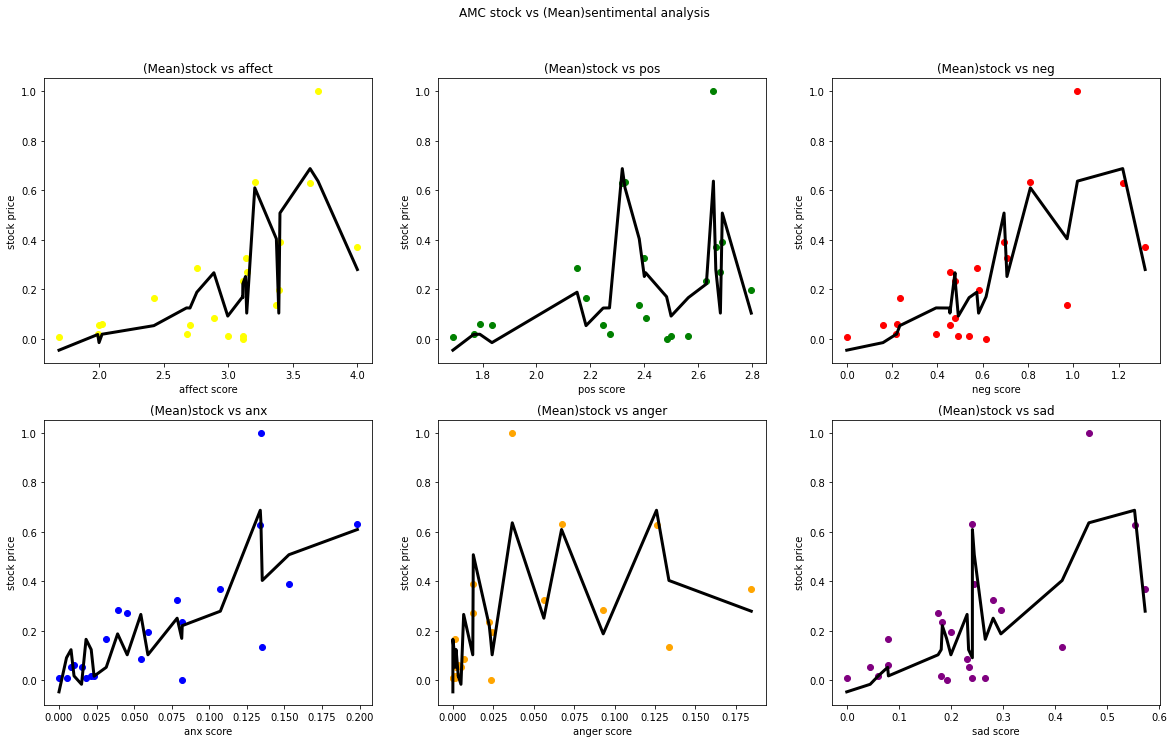

In [60]:
#plot amc
#In this part, it is plotting the data with the stock + the model itself
#Mean sentimental analysis
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Mean)sentimental analysis')
fig.set_size_inches(20,10)

amc_sort_affect_mean = amc_merge_pred_mean.sort_values(by=['affect'])
axs[0,0].scatter(amc_sort_affect_mean[['affect']],amc_sort_affect_mean[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(amc_sort_affect_mean[['affect']], amc_sort_affect_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('(Mean)stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

amc_sort_pos_mean = amc_merge_pred_mean.sort_values(by=['pos'])
axs[0,1].scatter(amc_sort_pos_mean[['pos']],amc_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(amc_sort_pos_mean[['pos']], amc_sort_pos_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(Mean)stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_mean = amc_merge_pred_mean.sort_values(by=['neg'])
axs[0,2].scatter(amc_sort_neg_mean[['neg']],amc_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(amc_sort_neg_mean[['neg']], amc_sort_neg_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('(Mean)stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

amc_sort_anx_mean = amc_merge_pred_mean.sort_values(by=['anx'])
axs[1,0].scatter(amc_sort_anx_mean[['anx']],amc_sort_anx_mean[['close']],color='blue',label='anx') #Plotting the data
axs[1,0].plot(amc_sort_anx_mean[['anx']], amc_sort_anx_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,0].set_title('(Mean)stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

amc_sort_anger_mean = amc_merge_pred_mean.sort_values(by=['anger'])
axs[1,1].scatter(amc_sort_anger_mean[['anger']],amc_sort_anger_mean[['close']],color='orange',label='anger') #Plotting the data
axs[1,1].plot(amc_sort_anger_mean[['anger']], amc_sort_anger_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,1].set_title('(Mean)stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

amc_sort_sad_mean = amc_merge_pred_mean.sort_values(by=['sad'])
axs[1,2].scatter(amc_sort_sad_mean[['sad']],amc_sort_sad_mean[['close']],color='purple',label='sad') #Plotting the data
axs[1,2].plot(amc_sort_sad_mean[['sad']], amc_sort_sad_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,2].set_title('(Mean)stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

In [61]:
#Median sentimental analysis
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Median)sentimental analysis')
# fig.set_size_inches(20,10)

# amc_sort_affect_median = amc_merge_pred_median.sort_values(by=['affect'])
# axs[0,0].scatter(amc_sort_affect_median[['affect']],amc_sort_affect_median[['close']],color='yellow',label='affect')#Plotting the data
# axs[0,0].plot(amc_sort_affect_median[['affect']], amc_sort_affect_median[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('(Median)stock vs affect')
# axs[0,0].set(xlabel='affect score', ylabel='stock price')

# amc_sort_pos_median = amc_merge_pred_median.sort_values(by=['pos'])
# axs[0,1].scatter(amc_sort_pos_median[['pos']],amc_sort_pos_median[['close']],color='green',label='pos')#Plotting the data
# axs[0,1].plot(amc_sort_pos_median[['pos']], amc_sort_pos_median[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('(Median)stock vs pos')
# axs[0,1].set(xlabel='pos score', ylabel='stock price')

# amc_sort_neg_median = amc_merge_pred_median.sort_values(by=['neg'])
# axs[0,2].scatter(amc_sort_neg_median[['neg']],amc_sort_neg_median[['close']],color='red',label='neg') #Plotting the data
# axs[0,2].plot(amc_sort_neg_median[['neg']], amc_sort_neg_median[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('(Median)stock vs neg')
# axs[0,2].set(xlabel='neg score', ylabel='stock price')

# amc_sort_anx_median = amc_merge_pred_median.sort_values(by=['anx'])
# axs[1,0].scatter(amc_sort_anx_median[['anx']],amc_sort_anx_median[['close']],color='blue',label='anx') #Plotting the data
# axs[1,0].plot(amc_sort_anx_median[['anx']], amc_sort_anx_median[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,0].set_title('(Median)stock vs anx')
# axs[1,0].set(xlabel='anx score', ylabel='stock price')

# amc_sort_anger_median = amc_merge_pred_median.sort_values(by=['anger'])
# axs[1,1].scatter(amc_sort_anger_median[['anger']],amc_sort_anger_median[['close']],color='orange',label='anger') #Plotting the data
# axs[1,1].plot(amc_sort_anger_median[['anger']], amc_sort_anger_median[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,1].set_title('(Median)stock vs anger')
# axs[1,1].set(xlabel='anger score', ylabel='stock price')

# amc_sort_sad_median = amc_merge_pred_median.sort_values(by=['sad'])
# axs[1,2].scatter(amc_sort_sad_median[['sad']],amc_sort_sad_median[['close']],color='purple',label='sad') #Plotting the data
# axs[1,2].plot(amc_sort_sad_median[['sad']], amc_sort_sad_median[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,2].set_title('(Median)stock vs sad')
# axs[1,2].set(xlabel='sad score', ylabel='stock price')

# plt.show()

In [62]:
#Std sentimental analysis
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Std)sentimental analysis')
# fig.set_size_inches(20,10)

# amc_sort_affect_std = amc_merge_pred_std.sort_values(by=['affect'])
# axs[0,0].scatter(amc_sort_affect_std[['affect']],amc_sort_affect_std[['close']],color='yellow',label='affect')#Plotting the data
# axs[0,0].plot(amc_sort_affect_std[['affect']], amc_sort_affect_std[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('(Std)stock vs affect')
# axs[0,0].set(xlabel='affect score', ylabel='stock price')

# amc_sort_pos_std = amc_merge_pred_std.sort_values(by=['pos'])
# axs[0,1].scatter(amc_sort_pos_std[['pos']],amc_sort_pos_std[['close']],color='green',label='pos')#Plotting the data
# axs[0,1].plot(amc_sort_pos_std[['pos']], amc_sort_pos_std[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('(Std)stock vs pos')
# axs[0,1].set(xlabel='pos score', ylabel='stock price')

# amc_sort_neg_std = amc_merge_pred_std.sort_values(by=['neg'])
# axs[0,2].scatter(amc_sort_neg_std[['neg']],amc_sort_neg_std[['close']],color='red',label='neg') #Plotting the data
# axs[0,2].plot(amc_sort_neg_std[['neg']], amc_sort_neg_std[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('(Std)stock vs neg')
# axs[0,2].set(xlabel='neg score', ylabel='stock price')

# amc_sort_anx_std = amc_merge_pred_std.sort_values(by=['anx'])
# axs[1,0].scatter(amc_sort_anx_std[['anx']],amc_sort_anx_std[['close']],color='blue',label='anx') #Plotting the data
# axs[1,0].plot(amc_sort_anx_std[['anx']], amc_sort_anx_std[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,0].set_title('(Std)stock vs anx')
# axs[1,0].set(xlabel='anx score', ylabel='stock price')

# amc_sort_anger_std = amc_merge_pred_std.sort_values(by=['anger'])
# axs[1,1].scatter(amc_sort_anger_std[['anger']],amc_sort_anger_std[['close']],color='orange',label='anger') #Plotting the data
# axs[1,1].plot(amc_sort_anger_std[['anger']], amc_sort_anger_std[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,1].set_title('(Std)stock vs anger')
# axs[1,1].set(xlabel='anger score', ylabel='stock price')

# amc_sort_sad_std = amc_merge_pred_std.sort_values(by=['sad'])
# axs[1,2].scatter(amc_sort_sad_std[['sad']],amc_sort_sad_std[['close']],color='purple',label='sad') #Plotting the data
# axs[1,2].plot(amc_sort_sad_std[['sad']], amc_sort_sad_std[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,2].set_title('(Std)stock vs sad')
# axs[1,2].set(xlabel='sad score', ylabel='stock price')

# plt.show()

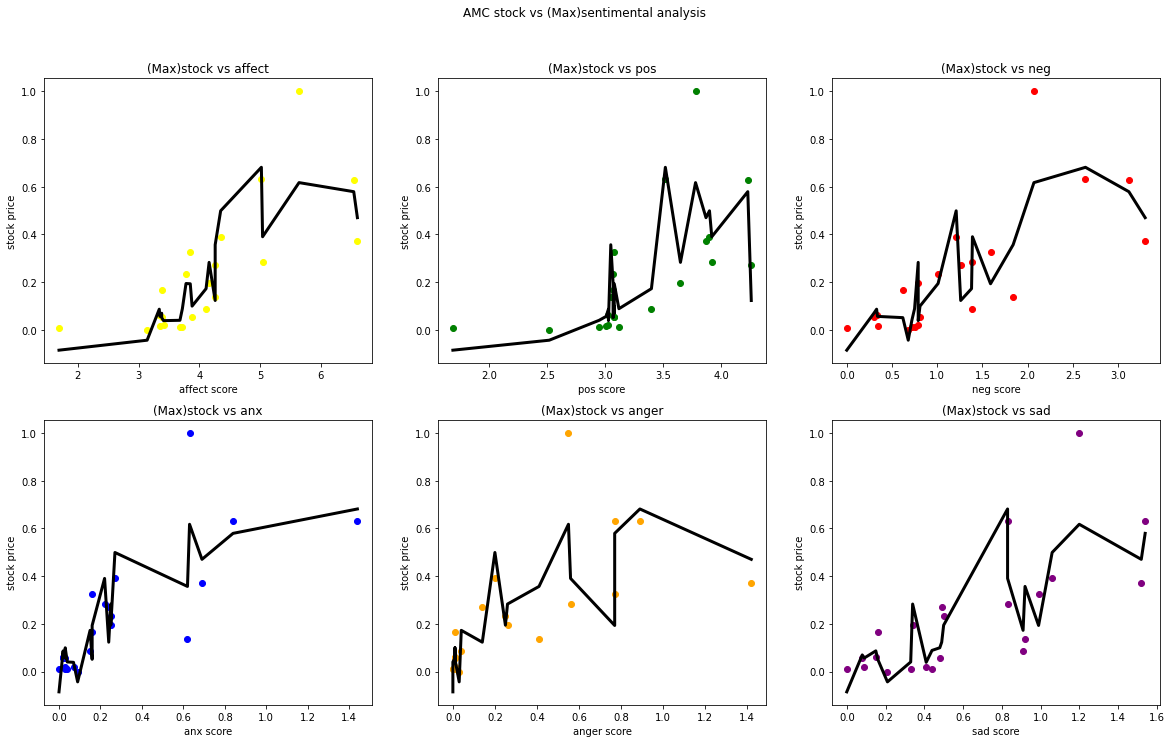

In [63]:
#Max sentimental analysis
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Max)sentimental analysis')
fig.set_size_inches(20,10)

amc_sort_affect_max = amc_merge_pred_max.sort_values(by=['affect'])
axs[0,0].scatter(amc_sort_affect_max[['affect']],amc_sort_affect_max[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(amc_sort_affect_max[['affect']], amc_sort_affect_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('(Max)stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

amc_sort_pos_max = amc_merge_pred_max.sort_values(by=['pos'])
axs[0,1].scatter(amc_sort_pos_max[['pos']],amc_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(amc_sort_pos_max[['pos']], amc_sort_pos_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(Max)stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_max = amc_merge_pred_max.sort_values(by=['neg'])
axs[0,2].scatter(amc_sort_neg_max[['neg']],amc_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(amc_sort_neg_max[['neg']], amc_sort_neg_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('(Max)stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

amc_sort_anx_max = amc_merge_pred_max.sort_values(by=['anx'])
axs[1,0].scatter(amc_sort_anx_max[['anx']],amc_sort_anx_max[['close']],color='blue',label='anx') #Plotting the data
axs[1,0].plot(amc_sort_anx_max[['anx']], amc_sort_anx_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,0].set_title('(Max)stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

amc_sort_anger_max = amc_merge_pred_max.sort_values(by=['anger'])
axs[1,1].scatter(amc_sort_anger_max[['anger']],amc_sort_anger_max[['close']],color='orange',label='anger') #Plotting the data
axs[1,1].plot(amc_sort_anger_max[['anger']], amc_sort_anger_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,1].set_title('(Max)stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

amc_sort_sad_max = amc_merge_pred_max.sort_values(by=['sad'])
axs[1,2].scatter(amc_sort_sad_max[['sad']],amc_sort_sad_max[['close']],color='purple',label='sad') #Plotting the data
axs[1,2].plot(amc_sort_sad_max[['sad']], amc_sort_sad_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,2].set_title('(Max)stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

In [64]:
#Min sentimental analysis
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Min)sentimental analysis')
# fig.set_size_inches(20,10)

# amc_sort_affect_min = amc_merge_pred_min.sort_values(by=['affect'])
# axs[0,0].scatter(amc_sort_affect_min[['affect']],amc_sort_affect_min[['close']],color='yellow',label='affect')#Plotting the data
# axs[0,0].plot(amc_sort_affect_min[['affect']], amc_sort_affect_min[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('(Min)stock vs affect')
# axs[0,0].set(xlabel='affect score', ylabel='stock price')

# amc_sort_pos_min = amc_merge_pred_min.sort_values(by=['pos'])
# axs[0,1].scatter(amc_sort_pos_min[['pos']],amc_sort_pos_min[['close']],color='green',label='pos')#Plotting the data
# axs[0,1].plot(amc_sort_pos_min[['pos']], amc_sort_pos_min[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('(Min)stock vs pos')
# axs[0,1].set(xlabel='pos score', ylabel='stock price')

# amc_sort_neg_min = amc_merge_pred_min.sort_values(by=['neg'])
# axs[0,2].scatter(amc_sort_neg_min[['neg']],amc_sort_neg_min[['close']],color='red',label='neg') #Plotting the data
# axs[0,2].plot(amc_sort_neg_min[['neg']], amc_sort_neg_min[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('(Min)stock vs neg')
# axs[0,2].set(xlabel='neg score', ylabel='stock price')

# amc_sort_anx_min = amc_merge_pred_min.sort_values(by=['anx'])
# axs[1,0].scatter(amc_sort_anx_min[['anx']],amc_sort_anx_min[['close']],color='blue',label='anx') #Plotting the data
# axs[1,0].plot(amc_sort_anx_min[['anx']], amc_sort_anx_min[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,0].set_title('(Min)stock vs anx')
# axs[1,0].set(xlabel='anx score', ylabel='stock price')

# amc_sort_anger_min = amc_merge_pred_min.sort_values(by=['anger'])
# axs[1,1].scatter(amc_sort_anger_min[['anger']],amc_sort_anger_min[['close']],color='orange',label='anger') #Plotting the data
# axs[1,1].plot(amc_sort_anger_min[['anger']], amc_sort_anger_min[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,1].set_title('(Min)stock vs anger')
# axs[1,1].set(xlabel='anger score', ylabel='stock price')

# amc_sort_sad_min = amc_merge_pred_min.sort_values(by=['sad'])
# axs[1,2].scatter(amc_sort_sad_min[['sad']],amc_sort_sad_min[['close']],color='purple',label='sad') #Plotting the data
# axs[1,2].plot(amc_sort_sad_min[['sad']], amc_sort_sad_min[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,2].set_title('(Min)stock vs sad')
# axs[1,2].set(xlabel='sad score', ylabel='stock price')

# plt.show()

# Plot data against time

Plotting AMC stock with mean sentimental analysis

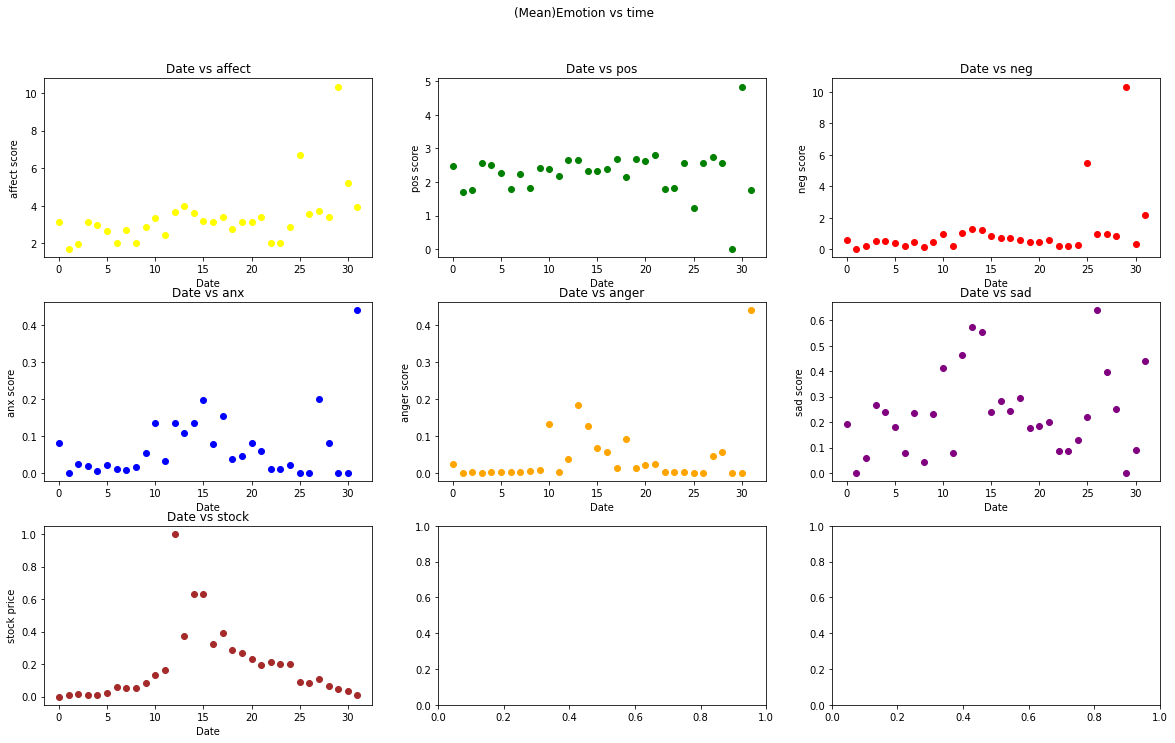

In [65]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Mean)Emotion vs time')
fig.set_size_inches(20,10)

amc_sort_affect_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_affect_mean.shape[0])],amc_sort_affect_mean[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

amc_sort_pos_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_pos_mean.shape[0])],amc_sort_pos_mean[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

amc_sort_neg_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(amc_sort_neg_mean.shape[0])],amc_sort_neg_mean[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

amc_sort_anx_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_anx_mean.shape[0])],amc_sort_anx_mean[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

amc_sort_anger_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(amc_sort_anger_mean.shape[0])],amc_sort_anger_mean[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

amc_sort_sad_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(amc_sort_sad_mean.shape[0])],amc_sort_sad_mean[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

amc_sort_date = amc_merge_df_mean.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting AMC stock with median sentimental analysis

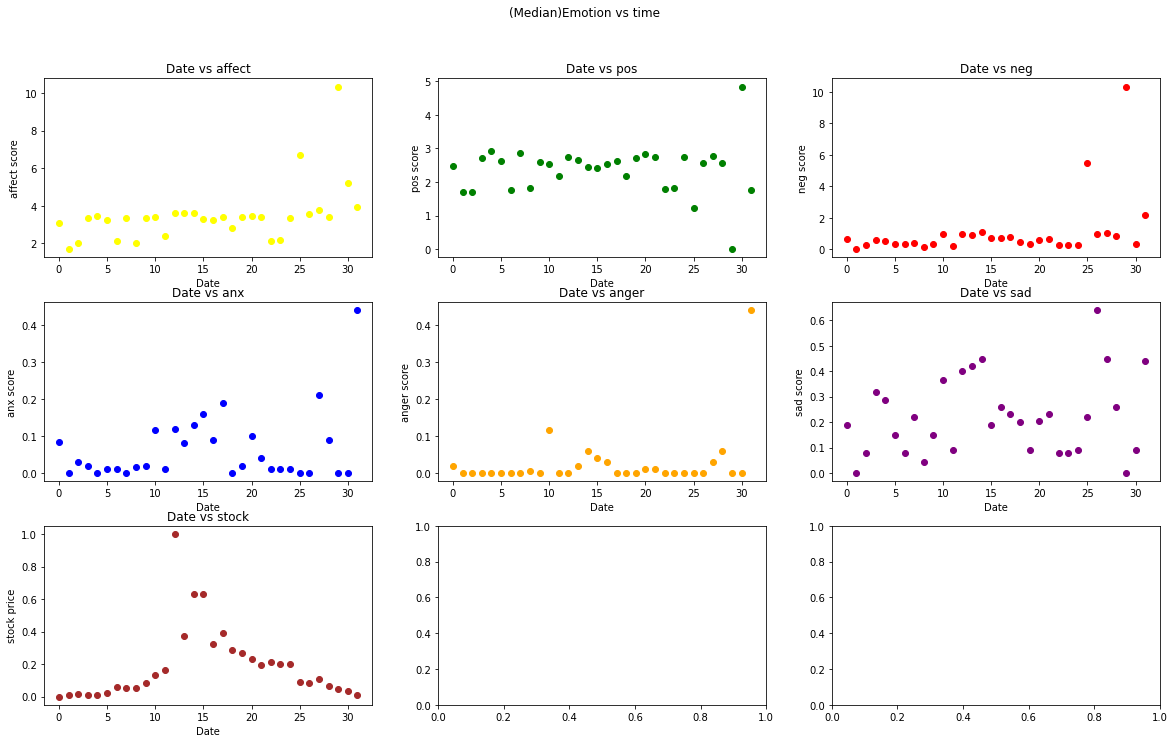

In [66]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Median)Emotion vs time')
fig.set_size_inches(20,10)

amc_sort_affect_median = amc_merge_df_median.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_affect_median.shape[0])],amc_sort_affect_median[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

amc_sort_pos_median = amc_merge_df_median.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_pos_median.shape[0])],amc_sort_pos_median[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

amc_sort_neg_median = amc_merge_df_median.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(amc_sort_neg_median.shape[0])],amc_sort_neg_median[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

amc_sort_anx_median = amc_merge_df_median.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_anx_median.shape[0])],amc_sort_anx_median[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

amc_sort_anger_median = amc_merge_df_median.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(amc_sort_anger_median.shape[0])],amc_sort_anger_median[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

amc_sort_sad_median = amc_merge_df_median.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(amc_sort_sad_median.shape[0])],amc_sort_sad_median[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

amc_sort_date = amc_merge_df_median.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting AMC stock with std sentimental analysis

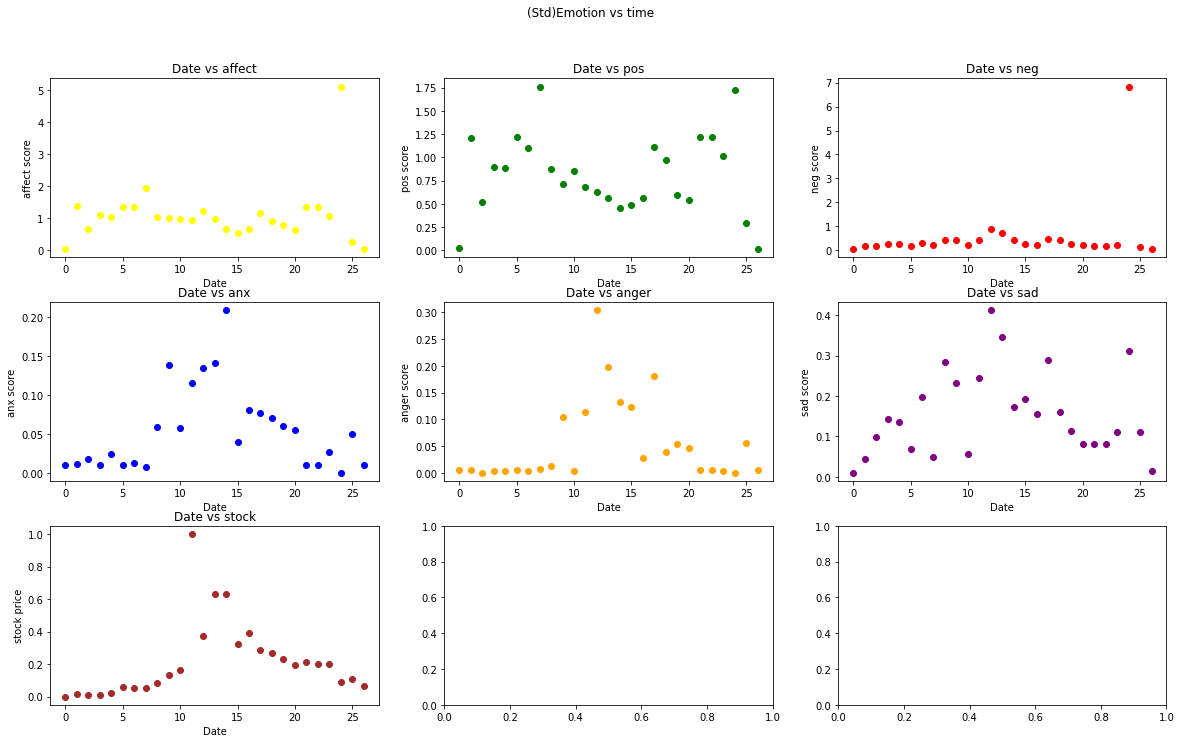

In [67]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Std)Emotion vs time')
fig.set_size_inches(20,10)

amc_sort_affect_std = amc_merge_df_std.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_affect_std.shape[0])],amc_sort_affect_std[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

amc_sort_pos_std = amc_merge_df_std.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_pos_std.shape[0])],amc_sort_pos_std[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

amc_sort_neg_std = amc_merge_df_std.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(amc_sort_neg_std.shape[0])],amc_sort_neg_std[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

amc_sort_anx_std = amc_merge_df_std.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_anx_std.shape[0])],amc_sort_anx_std[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

amc_sort_anger_std = amc_merge_df_std.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(amc_sort_anger_std.shape[0])],amc_sort_anger_std[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

amc_sort_sad_std = amc_merge_df_std.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(amc_sort_sad_std.shape[0])],amc_sort_sad_std[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

amc_sort_date = amc_merge_df_std.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting AMC stock with maximum sentimental analysis

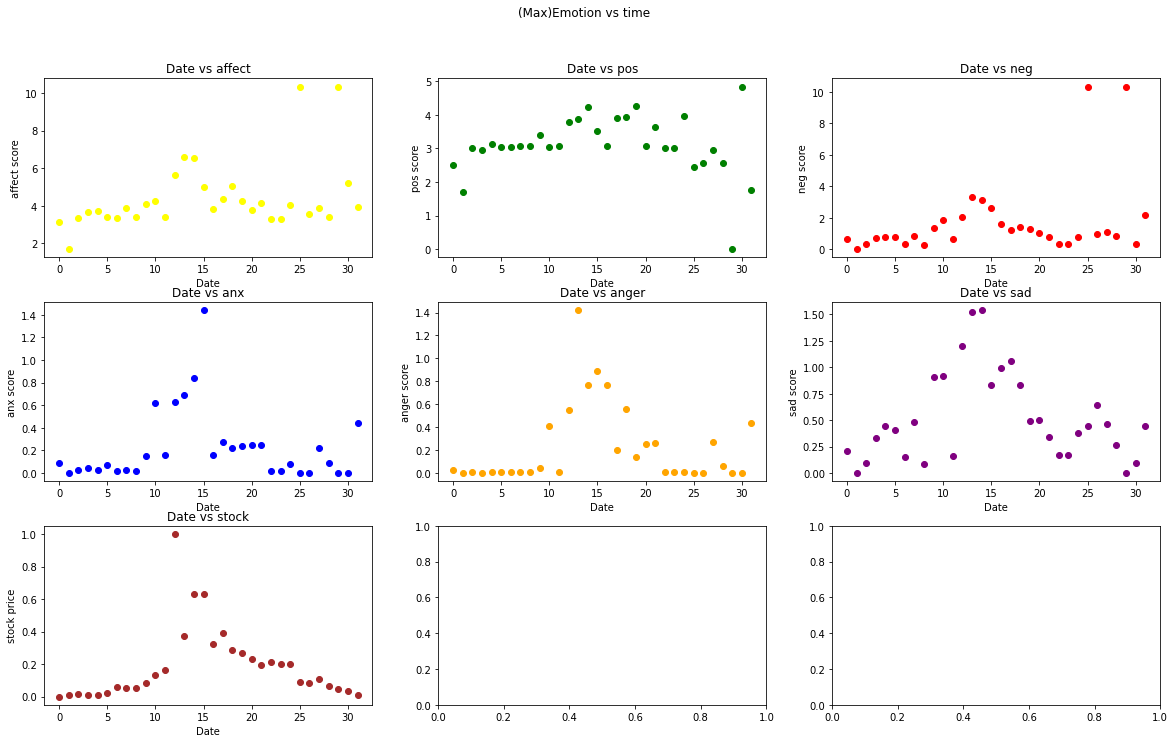

In [68]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Max)Emotion vs time')
fig.set_size_inches(20,10)

amc_sort_affect_max = amc_merge_df_max.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_affect_max.shape[0])],amc_sort_affect_max[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

amc_sort_pos_max = amc_merge_df_max.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_pos_max.shape[0])],amc_sort_pos_max[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

amc_sort_neg_max = amc_merge_df_max.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(amc_sort_neg_max.shape[0])],amc_sort_neg_max[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

amc_sort_anx_max = amc_merge_df_max.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_anx_max.shape[0])],amc_sort_anx_max[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

amc_sort_anger_max = amc_merge_df_max.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(amc_sort_anger_max.shape[0])],amc_sort_anger_max[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

amc_sort_sad_max = amc_merge_df_max.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(amc_sort_sad_max.shape[0])],amc_sort_sad_max[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

amc_sort_date = amc_merge_df_max.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting AMC stock with minimum sentimental analysis

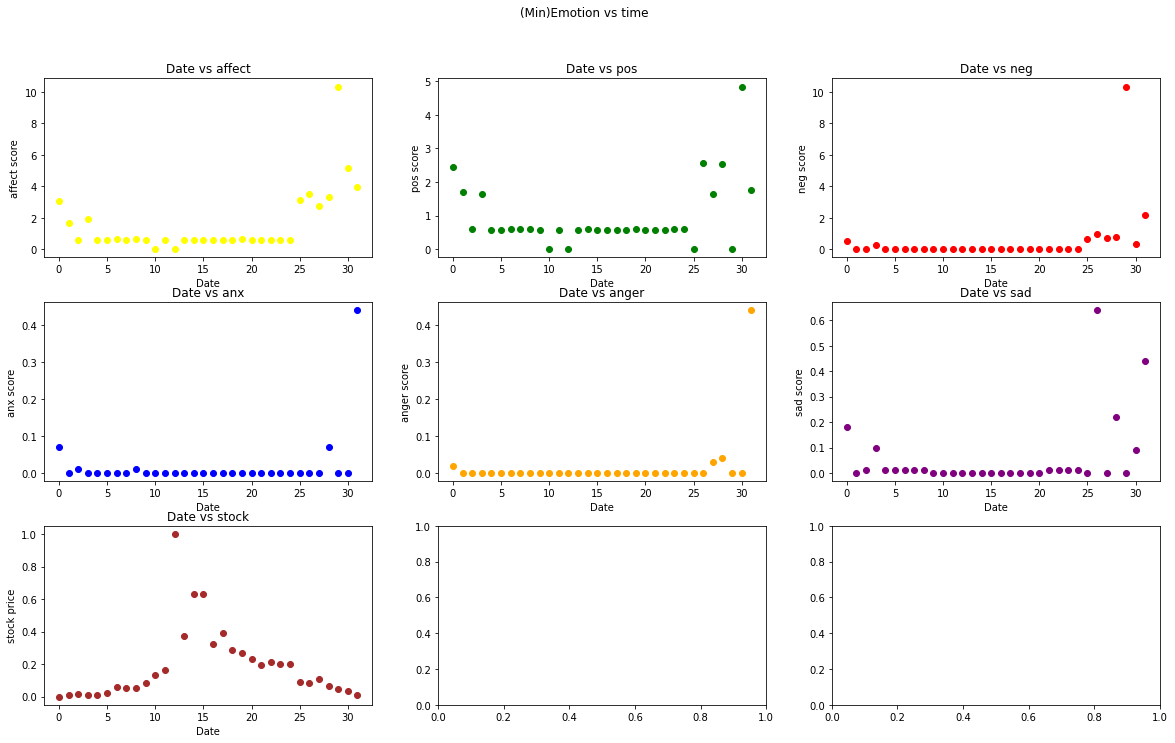

In [69]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Min)Emotion vs time')
fig.set_size_inches(20,10)

amc_sort_affect_min = amc_merge_df_min.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_affect_min.shape[0])],amc_sort_affect_min[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

amc_sort_pos_min = amc_merge_df_min.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_pos_min.shape[0])],amc_sort_pos_min[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

amc_sort_neg_min = amc_merge_df_min.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(amc_sort_neg_min.shape[0])],amc_sort_neg_min[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

amc_sort_anx_min = amc_merge_df_min.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_anx_min.shape[0])],amc_sort_anx_min[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

amc_sort_anger_min = amc_merge_df_min.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(amc_sort_anger_min.shape[0])],amc_sort_anger_min[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

amc_sort_sad_min = amc_merge_df_min.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(amc_sort_sad_min.shape[0])],amc_sort_sad_min[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

amc_sort_date = amc_merge_df_min.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

# Training with different method

Training with mean sentimental analysis

In [70]:
#Training models based on the amc data for four features(affect,neg,pos,anx,anger,sad) separately
reg_amc_affect_mean = LinearRegression().fit(amc_merge_df_mean[['affect']][:-10], amc_merge_df_mean[['close']][:-10])
reg_amc_pos_mean = LinearRegression().fit(amc_merge_df_mean[['pos']][:-10], amc_merge_df_mean[['close']][:-10])
reg_amc_neg_mean = LinearRegression().fit(amc_merge_df_mean[['neg']][:-10], amc_merge_df_mean[['close']][:-10])
reg_amc_anx_mean = LinearRegression().fit(amc_merge_df_mean[['anx']][:-10], amc_merge_df_mean[['close']][:-10])
reg_amc_anger_mean = LinearRegression().fit(amc_merge_df_mean[['anger']][:-10], amc_merge_df_mean[['close']][:-10])
reg_amc_sad_mean = LinearRegression().fit(amc_merge_df_mean[['sad']][:-10], amc_merge_df_mean[['close']][:-10])

In [71]:
#predict the stock price of amc using new models
pred_amc_affect_mean = reg_amc_affect_mean.predict(amc_merge_df_mean[['affect']][-10:])
pred_amc_pos_mean = reg_amc_pos_mean.predict(amc_merge_df_mean[['pos']][-10:])
pred_amc_neg_mean = reg_amc_neg_mean.predict(amc_merge_df_mean[['neg']][-10:])
pred_amc_anx_mean = reg_amc_anx_mean.predict(amc_merge_df_mean[['anx']][-10:])
pred_amc_anger_mean = reg_amc_anger_mean.predict(amc_merge_df_mean[['anger']][-10:])
pred_amc_sad_mean = reg_amc_sad_mean.predict(amc_merge_df_mean[['sad']][-10:])

#predict on the training model to plot the data
train_amc_affect_mean = reg_amc_affect_mean.predict(amc_merge_df_mean[['affect']][:-10])
train_amc_pos_mean = reg_amc_pos_mean.predict(amc_merge_df_mean[['pos']][:-10])
train_amc_neg_mean = reg_amc_neg_mean.predict(amc_merge_df_mean[['neg']][:-10])
train_amc_anx_mean = reg_amc_anx_mean.predict(amc_merge_df_mean[['anx']][:-10])
train_amc_anger_mean = reg_amc_anger_mean.predict(amc_merge_df_mean[['anger']][:-10])
train_amc_sad_mean = reg_amc_sad_mean.predict(amc_merge_df_mean[['sad']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_mean = pd.concat([amc_merge_df_mean[:-10], pd.DataFrame(train_amc_affect_mean,columns=['pred_affect'])], axis=1)
amc_merge_pred1_mean = pd.concat([amc_merge_pred1_mean, pd.DataFrame(train_amc_pos_mean,columns=['pred_pos'])], axis=1)
amc_merge_pred1_mean = pd.concat([amc_merge_pred1_mean, pd.DataFrame(train_amc_neg_mean,columns=['pred_neg'])], axis=1)
amc_merge_pred1_mean = pd.concat([amc_merge_pred1_mean, pd.DataFrame(train_amc_anx_mean,columns=['pred_anx'])], axis=1)
amc_merge_pred1_mean = pd.concat([amc_merge_pred1_mean, pd.DataFrame(train_amc_anger_mean,columns=['pred_anger'])], axis=1)
amc_merge_pred1_mean = pd.concat([amc_merge_pred1_mean, pd.DataFrame(train_amc_sad_mean,columns=['pred_sad'])], axis=1)

#amc_merge_pred1_mean

In [72]:
amc_score_affect_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_affect_mean)
amc_score_pos_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_pos_mean)
amc_score_neg_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_neg_mean)
amc_score_anx_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_anx_mean)
amc_score_anger_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_anger_mean)
amc_score_sad_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_sad_mean)
[amc_score_affect_mean,amc_score_pos_mean,amc_score_neg_mean,amc_score_anx_mean,amc_score_anger_mean,amc_score_sad_mean]

[0.6961203669859767,
 0.14698572381533104,
 3.650264803759458,
 0.2728603767983314,
 0.1308084559973745,
 0.06839139014626794]

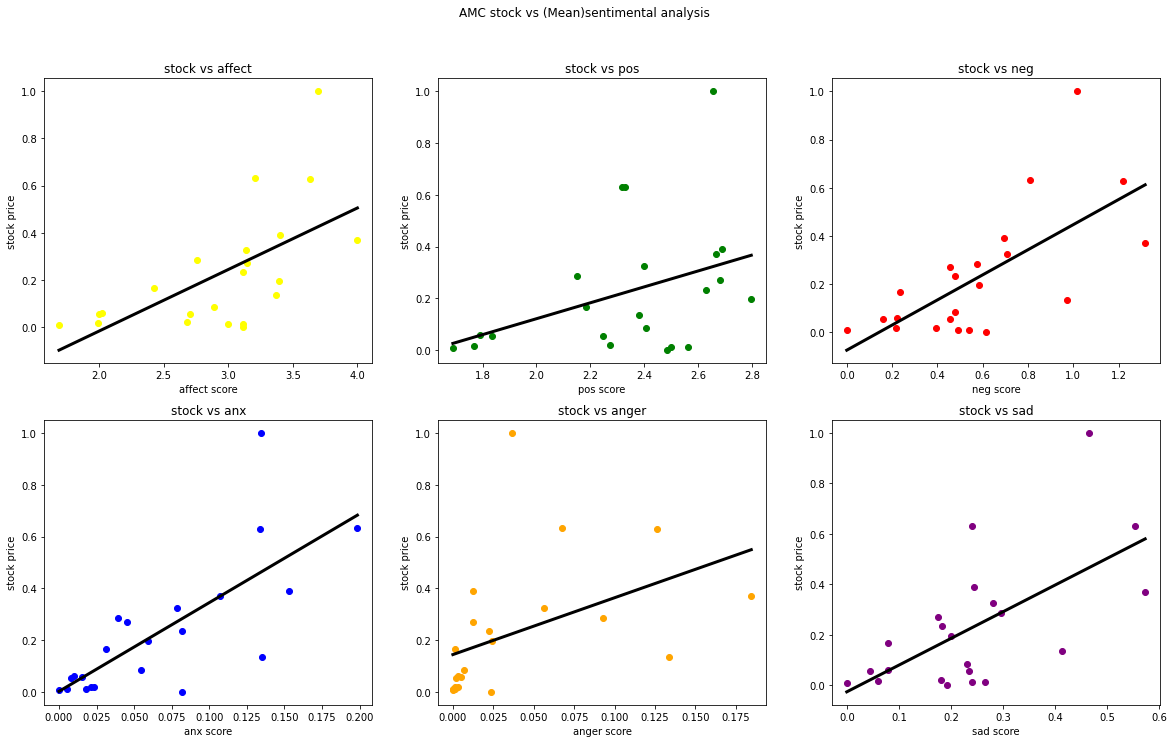

In [73]:
#plot the new amc model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Mean)sentimental analysis')
fig.set_size_inches(20,10)

amc_sort_affect_mean = amc_merge_pred1_mean.sort_values(by=['affect'])
axs[0,0].scatter(amc_sort_affect_mean[['affect']],amc_sort_affect_mean[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(amc_sort_affect_mean[['affect']], amc_sort_affect_mean[['pred_affect']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

amc_sort_pos_mean = amc_merge_pred1_mean.sort_values(by=['pos'])
axs[0,1].scatter(amc_sort_pos_mean[['pos']],amc_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(amc_sort_pos_mean[['pos']], amc_sort_pos_mean[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_mean = amc_merge_pred1_mean.sort_values(by=['neg'])
axs[0,2].scatter(amc_sort_neg_mean[['neg']],amc_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(amc_sort_neg_mean[['neg']], amc_sort_neg_mean[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

amc_sort_anx_mean = amc_merge_pred1_mean.sort_values(by=['anx'])
axs[1,0].scatter(amc_sort_anx_mean[['anx']],amc_sort_anx_mean[['close']],color='blue',label='anx')#Plotting the data
axs[1,0].plot(amc_sort_anx_mean[['anx']], amc_sort_anx_mean[['pred_anx']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

amc_sort_anger_mean = amc_merge_pred1_mean.sort_values(by=['anger'])
axs[1,1].scatter(amc_sort_anger_mean[['anger']],amc_sort_anger_mean[['close']],color='orange',label='anger')#Plotting the data
axs[1,1].plot(amc_sort_anger_mean[['anger']], amc_sort_anger_mean[['pred_anger']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

amc_sort_sad_mean = amc_merge_pred1_mean.sort_values(by=['sad'])
axs[1,2].scatter(amc_sort_sad_mean[['sad']],amc_sort_sad_mean[['close']],color='purple',label='sad')#Plotting the data
axs[1,2].plot(amc_sort_sad_mean[['sad']], amc_sort_sad_mean[['pred_sad']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,2].set_title('stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

Training with median sentimental analysis

In [74]:
#Training models based on the amc data for four features(affect,neg,pos,anx,anger,sad) separately
reg_amc_affect_median = LinearRegression().fit(amc_merge_df_median[['affect']][:-10], amc_merge_df_median[['close']][:-10])
reg_amc_pos_median = LinearRegression().fit(amc_merge_df_median[['pos']][:-10], amc_merge_df_median[['close']][:-10])
reg_amc_neg_median = LinearRegression().fit(amc_merge_df_median[['neg']][:-10], amc_merge_df_median[['close']][:-10])
reg_amc_anx_median = LinearRegression().fit(amc_merge_df_median[['anx']][:-10], amc_merge_df_median[['close']][:-10])
reg_amc_anger_median = LinearRegression().fit(amc_merge_df_median[['anger']][:-10], amc_merge_df_median[['close']][:-10])
reg_amc_sad_median = LinearRegression().fit(amc_merge_df_median[['sad']][:-10], amc_merge_df_median[['close']][:-10])

In [75]:
#predict the stock price of amc using new models
pred_amc_affect_median = reg_amc_affect_median.predict(amc_merge_df_median[['affect']][-10:])
pred_amc_pos_median = reg_amc_pos_median.predict(amc_merge_df_median[['pos']][-10:])
pred_amc_neg_median = reg_amc_neg_median.predict(amc_merge_df_median[['neg']][-10:])
pred_amc_anx_median = reg_amc_anx_median.predict(amc_merge_df_median[['anx']][-10:])
pred_amc_anger_median = reg_amc_anger_median.predict(amc_merge_df_median[['anger']][-10:])
pred_amc_sad_median = reg_amc_sad_median.predict(amc_merge_df_median[['sad']][-10:])

#predict on the training model to plot the data
train_amc_affect_median = reg_amc_affect_median.predict(amc_merge_df_median[['affect']][:-10])
train_amc_pos_median = reg_amc_pos_median.predict(amc_merge_df_median[['pos']][:-10])
train_amc_neg_median = reg_amc_neg_median.predict(amc_merge_df_median[['neg']][:-10])
train_amc_anx_median = reg_amc_anx_median.predict(amc_merge_df_median[['anx']][:-10])
train_amc_anger_median = reg_amc_anger_median.predict(amc_merge_df_median[['anger']][:-10])
train_amc_sad_median = reg_amc_sad_median.predict(amc_merge_df_median[['sad']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_median = pd.concat([amc_merge_df_median[:-10], pd.DataFrame(train_amc_affect_median,columns=['pred_affect'])], axis=1)
amc_merge_pred1_median = pd.concat([amc_merge_pred1_median, pd.DataFrame(train_amc_pos_median,columns=['pred_pos'])], axis=1)
amc_merge_pred1_median = pd.concat([amc_merge_pred1_median, pd.DataFrame(train_amc_neg_median,columns=['pred_neg'])], axis=1)
amc_merge_pred1_median = pd.concat([amc_merge_pred1_median, pd.DataFrame(train_amc_anx_median,columns=['pred_anx'])], axis=1)
amc_merge_pred1_median = pd.concat([amc_merge_pred1_median, pd.DataFrame(train_amc_anger_median,columns=['pred_anger'])], axis=1)
amc_merge_pred1_median = pd.concat([amc_merge_pred1_median, pd.DataFrame(train_amc_sad_median,columns=['pred_sad'])], axis=1)

# amc_merge_pred1_median

In [76]:
amc_score_affect_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_affect_median)
amc_score_pos_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_pos_median)
amc_score_neg_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_neg_median)
amc_score_anx_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_anx_median)
amc_score_anger_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_anger_median)
amc_score_sad_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_sad_median)
[amc_score_affect_median,amc_score_pos_median,amc_score_neg_median,amc_score_anx_median,amc_score_anger_median,amc_score_sad_median]

[0.3882816220656311,
 0.052145057078994694,
 4.580419168688038,
 0.22792204723460197,
 0.12183705715612958,
 0.08845897361830637]

In [77]:
#plot the new amc model
#In this part, it is plotting the data with the stock + the model itself
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Median)sentimental analysis')
# fig.set_size_inches(20,10)

# amc_sort_affect_median = amc_merge_pred1_median.sort_values(by=['affect'])
# axs[0,0].scatter(amc_sort_affect_median[['affect']],amc_sort_affect_median[['close']],color='yellow',label='affect')#Plotting the data
# axs[0,0].plot(amc_sort_affect_median[['affect']], amc_sort_affect_median[['pred_affect']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('stock vs affect')
# axs[0,0].set(xlabel='affect score', ylabel='stock price')

# amc_sort_pos_median = amc_merge_pred1_median.sort_values(by=['pos'])
# axs[0,1].scatter(amc_sort_pos_median[['pos']],amc_sort_pos_median[['close']],color='green',label='pos')#Plotting the data
# axs[0,1].plot(amc_sort_pos_median[['pos']], amc_sort_pos_median[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('stock vs pos')
# axs[0,1].set(xlabel='pos score', ylabel='stock price')

# amc_sort_neg_median = amc_merge_pred1_median.sort_values(by=['neg'])
# axs[0,2].scatter(amc_sort_neg_median[['neg']],amc_sort_neg_median[['close']],color='red',label='neg') #Plotting the data
# axs[0,2].plot(amc_sort_neg_median[['neg']], amc_sort_neg_median[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('stock vs neg')
# axs[0,2].set(xlabel='neg score', ylabel='stock price')

# amc_sort_anx_median = amc_merge_pred1_median.sort_values(by=['anx'])
# axs[1,0].scatter(amc_sort_anx_median[['anx']],amc_sort_anx_median[['close']],color='blue',label='anx')#Plotting the data
# axs[1,0].plot(amc_sort_anx_median[['anx']], amc_sort_anx_median[['pred_anx']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,0].set_title('stock vs anx')
# axs[1,0].set(xlabel='anx score', ylabel='stock price')

# amc_sort_anger_median = amc_merge_pred1_median.sort_values(by=['anger'])
# axs[1,1].scatter(amc_sort_anger_median[['anger']],amc_sort_anger_median[['close']],color='orange',label='anger')#Plotting the data
# axs[1,1].plot(amc_sort_anger_median[['anger']], amc_sort_anger_median[['pred_anger']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,1].set_title('stock vs anger')
# axs[1,1].set(xlabel='anger score', ylabel='stock price')

# amc_sort_sad_median = amc_merge_pred1_median.sort_values(by=['sad'])
# axs[1,2].scatter(amc_sort_sad_median[['sad']],amc_sort_sad_median[['close']],color='purple',label='sad')#Plotting the data
# axs[1,2].plot(amc_sort_sad_median[['sad']], amc_sort_sad_median[['pred_sad']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,2].set_title('stock vs sad')
# axs[1,2].set(xlabel='sad score', ylabel='stock price')

# plt.show()

Training with std sentimental analysis

In [78]:
#Training models based on the amc data for four features(affect,neg,pos,anx,anger,sad) separately
reg_amc_affect_std = LinearRegression().fit(amc_merge_df_std[['affect']][:-10], amc_merge_df_std[['close']][:-10])
reg_amc_pos_std = LinearRegression().fit(amc_merge_df_std[['pos']][:-10], amc_merge_df_std[['close']][:-10])
reg_amc_neg_std = LinearRegression().fit(amc_merge_df_std[['neg']][:-10], amc_merge_df_std[['close']][:-10])
reg_amc_anx_std = LinearRegression().fit(amc_merge_df_std[['anx']][:-10], amc_merge_df_std[['close']][:-10])
reg_amc_anger_std = LinearRegression().fit(amc_merge_df_std[['anger']][:-10], amc_merge_df_std[['close']][:-10])
reg_amc_sad_std = LinearRegression().fit(amc_merge_df_std[['sad']][:-10], amc_merge_df_std[['close']][:-10])

In [79]:
#predict the stock price of amc using new models
pred_amc_affect_std = reg_amc_affect_std.predict(amc_merge_df_std[['affect']][-10:])
pred_amc_pos_std = reg_amc_pos_std.predict(amc_merge_df_std[['pos']][-10:])
pred_amc_neg_std = reg_amc_neg_std.predict(amc_merge_df_std[['neg']][-10:])
pred_amc_anx_std = reg_amc_anx_std.predict(amc_merge_df_std[['anx']][-10:])
pred_amc_anger_std = reg_amc_anger_std.predict(amc_merge_df_std[['anger']][-10:])
pred_amc_sad_std = reg_amc_sad_std.predict(amc_merge_df_std[['sad']][-10:])

#predict on the training model to plot the data
train_amc_affect_std = reg_amc_affect_std.predict(amc_merge_df_std[['affect']][:-10])
train_amc_pos_std = reg_amc_pos_std.predict(amc_merge_df_std[['pos']][:-10])
train_amc_neg_std = reg_amc_neg_std.predict(amc_merge_df_std[['neg']][:-10])
train_amc_anx_std = reg_amc_anx_std.predict(amc_merge_df_std[['anx']][:-10])
train_amc_anger_std = reg_amc_anger_std.predict(amc_merge_df_std[['anger']][:-10])
train_amc_sad_std = reg_amc_sad_std.predict(amc_merge_df_std[['sad']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_std = pd.concat([amc_merge_df_std[:-10], pd.DataFrame(train_amc_affect_std,columns=['pred_affect'])], axis=1)
amc_merge_pred1_std = pd.concat([amc_merge_pred1_std, pd.DataFrame(train_amc_pos_std,columns=['pred_pos'])], axis=1)
amc_merge_pred1_std = pd.concat([amc_merge_pred1_std, pd.DataFrame(train_amc_neg_std,columns=['pred_neg'])], axis=1)
amc_merge_pred1_std = pd.concat([amc_merge_pred1_std, pd.DataFrame(train_amc_anx_std,columns=['pred_anx'])], axis=1)
amc_merge_pred1_std = pd.concat([amc_merge_pred1_std, pd.DataFrame(train_amc_anger_std,columns=['pred_anger'])], axis=1)
amc_merge_pred1_std = pd.concat([amc_merge_pred1_std, pd.DataFrame(train_amc_sad_std,columns=['pred_sad'])], axis=1)

#amc_merge_pred1_std

In [80]:
amc_score_affect_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_affect_std)
amc_score_pos_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_pos_std)
amc_score_neg_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_neg_std)
amc_score_anx_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_anx_std)
amc_score_anger_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_anger_std)
amc_score_sad_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_sad_std)
[amc_score_affect_std,amc_score_pos_std,amc_score_neg_std,amc_score_anx_std,amc_score_anger_std,amc_score_sad_std]

[0.029218249663797307,
 0.0248150031016035,
 2.5208099599969325,
 0.0074367911180415,
 0.008574524852201747,
 0.016567615519697106]

In [81]:
#plot the new amc model
#In this part, it is plotting the data with the stock + the model itself
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Std)sentimental analysis')
# fig.set_size_inches(20,10)

# amc_sort_affect_std = amc_merge_pred1_std.sort_values(by=['affect'])
# axs[0,0].scatter(amc_sort_affect_std[['affect']],amc_sort_affect_std[['close']],color='yellow',label='affect')#Plotting the data
# axs[0,0].plot(amc_sort_affect_std[['affect']], amc_sort_affect_std[['pred_affect']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('stock vs affect')
# axs[0,0].set(xlabel='affect score', ylabel='stock price')

# amc_sort_pos_std = amc_merge_pred1_std.sort_values(by=['pos'])
# axs[0,1].scatter(amc_sort_pos_std[['pos']],amc_sort_pos_std[['close']],color='green',label='pos')#Plotting the data
# axs[0,1].plot(amc_sort_pos_std[['pos']], amc_sort_pos_std[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('stock vs pos')
# axs[0,1].set(xlabel='pos score', ylabel='stock price')

# amc_sort_neg_std = amc_merge_pred1_std.sort_values(by=['neg'])
# axs[0,2].scatter(amc_sort_neg_std[['neg']],amc_sort_neg_std[['close']],color='red',label='neg') #Plotting the data
# axs[0,2].plot(amc_sort_neg_std[['neg']], amc_sort_neg_std[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('stock vs neg')
# axs[0,2].set(xlabel='neg score', ylabel='stock price')

# amc_sort_anx_std = amc_merge_pred1_std.sort_values(by=['anx'])
# axs[1,0].scatter(amc_sort_anx_std[['anx']],amc_sort_anx_std[['close']],color='blue',label='anx')#Plotting the data
# axs[1,0].plot(amc_sort_anx_std[['anx']], amc_sort_anx_std[['pred_anx']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,0].set_title('stock vs anx')
# axs[1,0].set(xlabel='anx score', ylabel='stock price')

# amc_sort_anger_std = amc_merge_pred1_std.sort_values(by=['anger'])
# axs[1,1].scatter(amc_sort_anger_std[['anger']],amc_sort_anger_std[['close']],color='orange',label='anger')#Plotting the data
# axs[1,1].plot(amc_sort_anger_std[['anger']], amc_sort_anger_std[['pred_anger']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,1].set_title('stock vs anger')
# axs[1,1].set(xlabel='anger score', ylabel='stock price')

# amc_sort_sad_std = amc_merge_pred1_std.sort_values(by=['sad'])
# axs[1,2].scatter(amc_sort_sad_std[['sad']],amc_sort_sad_std[['close']],color='purple',label='sad')#Plotting the data
# axs[1,2].plot(amc_sort_sad_std[['sad']], amc_sort_sad_std[['pred_sad']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,2].set_title('stock vs sad')
# axs[1,2].set(xlabel='sad score', ylabel='stock price')

# plt.show()

Training with maximum sentimental analysis

In [82]:
#Training models based on the amc data for four features(affect,neg,pos,anx,anger,sad) separately
reg_amc_affect_max = LinearRegression().fit(amc_merge_df_max[['affect']][:-10], amc_merge_df_max[['close']][:-10])
reg_amc_pos_max = LinearRegression().fit(amc_merge_df_max[['pos']][:-10], amc_merge_df_max[['close']][:-10])
reg_amc_neg_max = LinearRegression().fit(amc_merge_df_max[['neg']][:-10], amc_merge_df_max[['close']][:-10])
reg_amc_anx_max = LinearRegression().fit(amc_merge_df_max[['anx']][:-10], amc_merge_df_max[['close']][:-10])
reg_amc_anger_max = LinearRegression().fit(amc_merge_df_max[['anger']][:-10], amc_merge_df_max[['close']][:-10])
reg_amc_sad_max = LinearRegression().fit(amc_merge_df_max[['sad']][:-10], amc_merge_df_max[['close']][:-10])

In [83]:
#predict the stock price of amc using new models
pred_amc_affect_max = reg_amc_affect_max.predict(amc_merge_df_max[['affect']][-10:])
pred_amc_pos_max = reg_amc_pos_max.predict(amc_merge_df_max[['pos']][-10:])
pred_amc_neg_max = reg_amc_neg_max.predict(amc_merge_df_max[['neg']][-10:])
pred_amc_anx_max = reg_amc_anx_max.predict(amc_merge_df_max[['anx']][-10:])
pred_amc_anger_max = reg_amc_anger_max.predict(amc_merge_df_max[['anger']][-10:])
pred_amc_sad_max = reg_amc_sad_max.predict(amc_merge_df_max[['sad']][-10:])

#predict on the training model to plot the data
train_amc_affect_max = reg_amc_affect_max.predict(amc_merge_df_max[['affect']][:-10])
train_amc_pos_max = reg_amc_pos_max.predict(amc_merge_df_max[['pos']][:-10])
train_amc_neg_max = reg_amc_neg_max.predict(amc_merge_df_max[['neg']][:-10])
train_amc_anx_max = reg_amc_anx_max.predict(amc_merge_df_max[['anx']][:-10])
train_amc_anger_max = reg_amc_anger_max.predict(amc_merge_df_max[['anger']][:-10])
train_amc_sad_max = reg_amc_sad_max.predict(amc_merge_df_max[['sad']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_max = pd.concat([amc_merge_df_max[:-10], pd.DataFrame(train_amc_affect_max,columns=['pred_affect'])], axis=1)
amc_merge_pred1_max = pd.concat([amc_merge_pred1_max, pd.DataFrame(train_amc_pos_max,columns=['pred_pos'])], axis=1)
amc_merge_pred1_max = pd.concat([amc_merge_pred1_max, pd.DataFrame(train_amc_neg_max,columns=['pred_neg'])], axis=1)
amc_merge_pred1_max = pd.concat([amc_merge_pred1_max, pd.DataFrame(train_amc_anx_max,columns=['pred_anx'])], axis=1)
amc_merge_pred1_max = pd.concat([amc_merge_pred1_max, pd.DataFrame(train_amc_anger_max,columns=['pred_anger'])], axis=1)
amc_merge_pred1_max = pd.concat([amc_merge_pred1_max, pd.DataFrame(train_amc_sad_max,columns=['pred_sad'])], axis=1)

#amc_merge_pred1_max

In [84]:
amc_score_affect_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_affect_max)
amc_score_pos_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_pos_max)
amc_score_neg_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_neg_max)
amc_score_anx_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_anx_max)
amc_score_anger_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_anger_max)
amc_score_sad_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_sad_max)
[amc_score_affect_max,amc_score_pos_max,amc_score_neg_max,amc_score_anx_max,amc_score_anger_max,amc_score_sad_max]

[0.32056017993758407,
 0.1006912187454276,
 0.8930098259831818,
 0.014129735058652832,
 0.013431540805826253,
 0.011359777320284273]

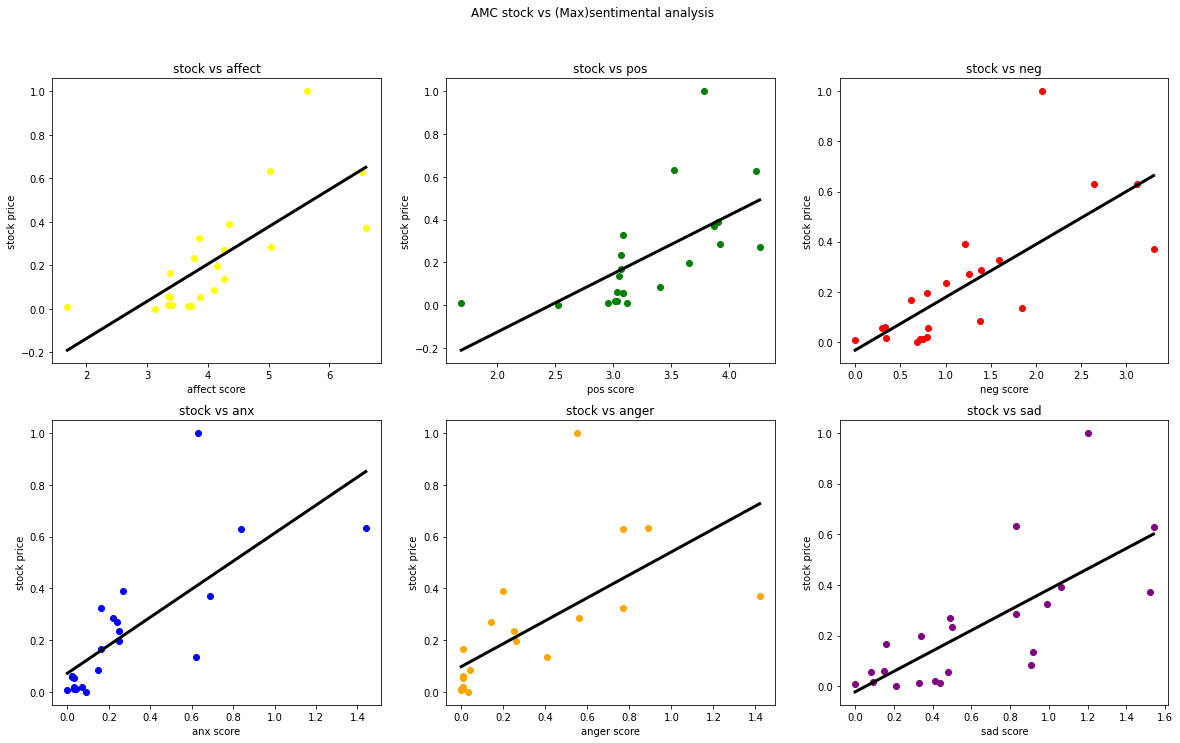

In [85]:
#plot the new amc model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Max)sentimental analysis')
fig.set_size_inches(20,10)

amc_sort_affect_max = amc_merge_pred1_max.sort_values(by=['affect'])
axs[0,0].scatter(amc_sort_affect_max[['affect']],amc_sort_affect_max[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(amc_sort_affect_max[['affect']], amc_sort_affect_max[['pred_affect']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

amc_sort_pos_max = amc_merge_pred1_max.sort_values(by=['pos'])
axs[0,1].scatter(amc_sort_pos_max[['pos']],amc_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(amc_sort_pos_max[['pos']], amc_sort_pos_max[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

amc_sort_neg_max = amc_merge_pred1_max.sort_values(by=['neg'])
axs[0,2].scatter(amc_sort_neg_max[['neg']],amc_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(amc_sort_neg_max[['neg']], amc_sort_neg_max[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

amc_sort_anx_max = amc_merge_pred1_max.sort_values(by=['anx'])
axs[1,0].scatter(amc_sort_anx_max[['anx']],amc_sort_anx_max[['close']],color='blue',label='anx')#Plotting the data
axs[1,0].plot(amc_sort_anx_max[['anx']], amc_sort_anx_max[['pred_anx']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

amc_sort_anger_max = amc_merge_pred1_max.sort_values(by=['anger'])
axs[1,1].scatter(amc_sort_anger_max[['anger']],amc_sort_anger_max[['close']],color='orange',label='anger')#Plotting the data
axs[1,1].plot(amc_sort_anger_max[['anger']], amc_sort_anger_max[['pred_anger']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

amc_sort_sad_max = amc_merge_pred1_max.sort_values(by=['sad'])
axs[1,2].scatter(amc_sort_sad_max[['sad']],amc_sort_sad_max[['close']],color='purple',label='sad')#Plotting the data
axs[1,2].plot(amc_sort_sad_max[['sad']], amc_sort_sad_max[['pred_sad']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,2].set_title('stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

Training with minimum sentimental analysis

In [86]:
#Training models based on the amc data for four features(affect,neg,pos,anx,anger,sad) separately
reg_amc_affect_min = LinearRegression().fit(amc_merge_df_min[['affect']][:-10], amc_merge_df_min[['close']][:-10])
reg_amc_pos_min = LinearRegression().fit(amc_merge_df_min[['pos']][:-10], amc_merge_df_min[['close']][:-10])
reg_amc_neg_min = LinearRegression().fit(amc_merge_df_min[['neg']][:-10], amc_merge_df_min[['close']][:-10])
reg_amc_anx_min = LinearRegression().fit(amc_merge_df_min[['anx']][:-10], amc_merge_df_min[['close']][:-10])
reg_amc_anger_min = LinearRegression().fit(amc_merge_df_min[['anger']][:-10], amc_merge_df_min[['close']][:-10])
reg_amc_sad_min = LinearRegression().fit(amc_merge_df_min[['sad']][:-10], amc_merge_df_min[['close']][:-10])

In [87]:
#predict the stock price of amc using new models
pred_amc_affect_min = reg_amc_affect_min.predict(amc_merge_df_min[['affect']][-10:])
pred_amc_pos_min = reg_amc_pos_min.predict(amc_merge_df_min[['pos']][-10:])
pred_amc_neg_min = reg_amc_neg_min.predict(amc_merge_df_min[['neg']][-10:])
pred_amc_anx_min = reg_amc_anx_min.predict(amc_merge_df_min[['anx']][-10:])
pred_amc_anger_min = reg_amc_anger_min.predict(amc_merge_df_min[['anger']][-10:])
pred_amc_sad_min = reg_amc_sad_min.predict(amc_merge_df_min[['sad']][-10:])

#predict on the training model to plot the data
train_amc_affect_min = reg_amc_affect_min.predict(amc_merge_df_min[['affect']][:-10])
train_amc_pos_min = reg_amc_pos_min.predict(amc_merge_df_min[['pos']][:-10])
train_amc_neg_min = reg_amc_neg_min.predict(amc_merge_df_min[['neg']][:-10])
train_amc_anx_min = reg_amc_anx_min.predict(amc_merge_df_min[['anx']][:-10])
train_amc_anger_min = reg_amc_anger_min.predict(amc_merge_df_min[['anger']][:-10])
train_amc_sad_min = reg_amc_sad_min.predict(amc_merge_df_min[['sad']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_min = pd.concat([amc_merge_df_min[:-10], pd.DataFrame(train_amc_affect_min,columns=['pred_affect'])], axis=1)
amc_merge_pred1_min = pd.concat([amc_merge_pred1_min, pd.DataFrame(train_amc_pos_min,columns=['pred_pos'])], axis=1)
amc_merge_pred1_min = pd.concat([amc_merge_pred1_min, pd.DataFrame(train_amc_neg_min,columns=['pred_neg'])], axis=1)
amc_merge_pred1_min = pd.concat([amc_merge_pred1_min, pd.DataFrame(train_amc_anx_min,columns=['pred_anx'])], axis=1)
amc_merge_pred1_min = pd.concat([amc_merge_pred1_min, pd.DataFrame(train_amc_anger_min,columns=['pred_anger'])], axis=1)
amc_merge_pred1_min = pd.concat([amc_merge_pred1_min, pd.DataFrame(train_amc_sad_min,columns=['pred_sad'])], axis=1)

#amc_merge_pred1_min

In [88]:
amc_score_affect_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_affect_min)
amc_score_pos_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_pos_min)
amc_score_neg_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_neg_min)
amc_score_anx_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_anx_min)
amc_score_anger_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_anger_min)
amc_score_sad_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_sad_min)
[amc_score_affect_min,amc_score_pos_min,amc_score_neg_min,amc_score_anx_min,amc_score_anger_min,amc_score_sad_min]

[0.2566186697183033,
 0.07736157434097678,
 4.1693749213308084,
 0.2684547646767459,
 2.498966147451787,
 0.17152722298554418]

In [89]:
#plot the new amc model
#In this part, it is plotting the data with the stock + the model itself
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Min)sentimental analysis')
# fig.set_size_inches(20,10)

# amc_sort_affect_min = amc_merge_pred1_min.sort_values(by=['affect'])
# axs[0,0].scatter(amc_sort_affect_min[['affect']],amc_sort_affect_min[['close']],color='yellow',label='affect')#Plotting the data
# axs[0,0].plot(amc_sort_affect_min[['affect']], amc_sort_affect_min[['pred_affect']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('stock vs affect')
# axs[0,0].set(xlabel='affect score', ylabel='stock price')

# amc_sort_pos_min = amc_merge_pred1_min.sort_values(by=['pos'])
# axs[0,1].scatter(amc_sort_pos_min[['pos']],amc_sort_pos_min[['close']],color='green',label='pos')#Plotting the data
# axs[0,1].plot(amc_sort_pos_min[['pos']], amc_sort_pos_min[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('stock vs pos')
# axs[0,1].set(xlabel='pos score', ylabel='stock price')

# amc_sort_neg_min = amc_merge_pred1_min.sort_values(by=['neg'])
# axs[0,2].scatter(amc_sort_neg_min[['neg']],amc_sort_neg_min[['close']],color='red',label='neg') #Plotting the data
# axs[0,2].plot(amc_sort_neg_min[['neg']], amc_sort_neg_min[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('stock vs neg')
# axs[0,2].set(xlabel='neg score', ylabel='stock price')

# amc_sort_anx_min = amc_merge_pred1_min.sort_values(by=['anx'])
# axs[1,0].scatter(amc_sort_anx_min[['anx']],amc_sort_anx_min[['close']],color='blue',label='anx')#Plotting the data
# axs[1,0].plot(amc_sort_anx_min[['anx']], amc_sort_anx_min[['pred_anx']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,0].set_title('stock vs anx')
# axs[1,0].set(xlabel='anx score', ylabel='stock price')

# amc_sort_anger_min = amc_merge_pred1_min.sort_values(by=['anger'])
# axs[1,1].scatter(amc_sort_anger_min[['anger']],amc_sort_anger_min[['close']],color='orange',label='anger')#Plotting the data
# axs[1,1].plot(amc_sort_anger_min[['anger']], amc_sort_anger_min[['pred_anger']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,1].set_title('stock vs anger')
# axs[1,1].set(xlabel='anger score', ylabel='stock price')

# amc_sort_sad_min = amc_merge_pred1_min.sort_values(by=['sad'])
# axs[1,2].scatter(amc_sort_sad_min[['sad']],amc_sort_sad_min[['close']],color='purple',label='sad')#Plotting the data
# axs[1,2].plot(amc_sort_sad_min[['sad']], amc_sort_sad_min[['pred_sad']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,2].set_title('stock vs sad')
# axs[1,2].set(xlabel='sad score', ylabel='stock price')

# plt.show()